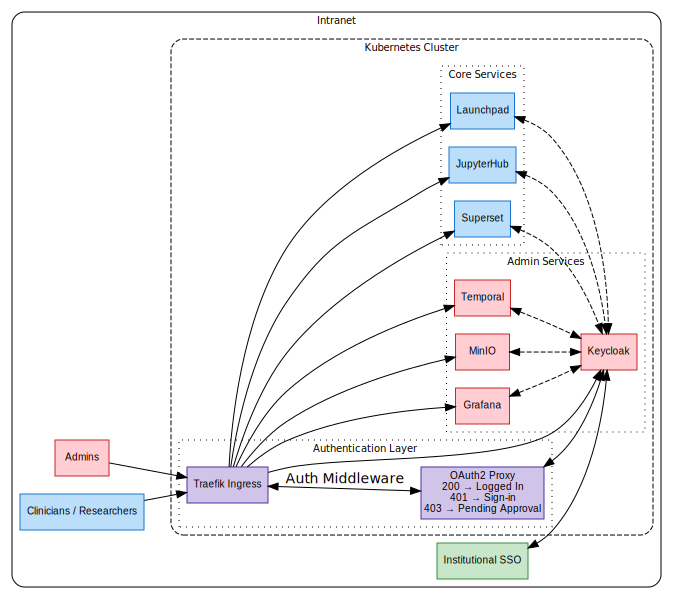

In [16]:
from graphviz import Digraph
dot = Digraph('infra', format='png')  
dot.attr(rankdir='LR', fontsize='10')  
  
# Global node style  
dot.node_attr.update(shape='box', style='filled', fillcolor='#E8F0FE', color='#4285F4', fontname='Helvetica', fontsize='10')  
  
# Create Hospital Intranet cluster  
with dot.subgraph(name='cluster_intranet') as intranet:  
    intranet.attr(label='Intranet', style='rounded')  
  
    # Kubernetes cluster subgraph  
    with intranet.subgraph(name='cluster_k8s') as k8s:  
        k8s.attr(label='Kubernetes Cluster', style='rounded,dashed')  
  
        # Admin services  
        with k8s.subgraph(name='cluster_admin') as admin:  
            admin.attr(label='Admin Services', style='dotted')  
            admin.node_attr.update(fillcolor='#FFCDD2', color='#C62828')  
            admin.node('Keycloak', 'Keycloak')  
            admin.node('Grafana', 'Grafana')  
            admin.node('Minio', 'MinIO')  
            admin.node('Temporal', 'Temporal')  
        
        # Core services  
        with k8s.subgraph(name='cluster_back') as back:  
            back.attr(label='Core Services', style='dotted')  
            back.node_attr.update(fillcolor='#BBDEFB', color='#1976D2')  
            back.node('SS', 'Superset')  
            back.node('JH', 'JupyterHub')  
            back.node('Launchpad', 'Launchpad')  
  
        # Utility services  
        with k8s.subgraph(name='cluster_util') as util:  
            util.attr(label='Authentication Layer', style='dotted')  
            util.node_attr.update(fillcolor='#D1C4E9', color='#512DA8')  
            util.node('Ingress', 'Traefik Ingress')  
            util.node('OAuth2', 'OAuth2 Proxy\n200 → Logged In\n401 → Sign-in\n403 → Pending Approval')
  
    # User traffic (internal users)  
    intranet.node('Admins', 'Admins', fillcolor='#FFCDD2', color='#C62828')  
    intranet.node('Users', 'Clinicians / Researchers', fillcolor='#BBDEFB', color='#1976D2')  

    # Intranet Traffic
    intranet.node('SSO', 'Institutional SSO', fillcolor='#C8E6C9', color='#388E3C')  
    
# Routing  
dot.edge('Users', 'Ingress')  
dot.edge('Admins', 'Ingress')  
dot.edge('Ingress', 'OAuth2', dir='both', label='Auth Middleware')
dot.edge('Ingress', 'Minio')  
dot.edge('Ingress', 'Temporal')  
dot.edge('Ingress', 'Grafana')   
dot.edge('Ingress', 'Keycloak')
dot.edge('Ingress', 'SS')  
dot.edge('Ingress', 'Launchpad')  
dot.edge('Ingress', 'JH')  
  
dot.edge('OAuth2', 'Keycloak', dir='both')
dot.edge('SSO', 'Keycloak', dir='both')
dot.edge('Launchpad', 'Keycloak', dir='both', style='dashed')
dot.edge('JH', 'Keycloak', dir='both', style='dashed')  
dot.edge('SS', 'Keycloak', dir='both', style='dashed')  
dot.edge('Minio', 'Keycloak', dir='both', style='dashed')  
dot.edge('Temporal', 'Keycloak', dir='both', style='dashed')
dot.edge('Grafana', 'Keycloak', dir='both', style='dashed')

# Render  
file_path = 'scout_auth_diagram'  
dot.render(file_path, cleanup=True)  
  
file_path + '.png'  
dot